
# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Reading dataset

In [2]:
d=pd.read_excel(r"C:\Users\bb\Desktop\regression.xlsx")

In [3]:
d

,Age in years(x),Blood pressure(y)
0,56,147
1,42,125
2,72,160
3,36,118
4,63,149
5,47,128
6,55,150
7,49,145
8,38,115
9,42,140


# Exploring data

In [4]:
d.head()

,Age in years(x),Blood pressure(y)
0,56,147
1,42,125
2,72,160
3,36,118
4,63,149


In [5]:
d.shape

(20, 2)

In [6]:
d.info

<bound method DataFrame.info of     Age in years(x)  Blood pressure(y)
0                56                147
1                42                125
2                72                160
3                36                118
4                63                149
5                47                128
6                55                150
7                49                145
8                38                115
9                42                140
10               68                152
11               60                155
12               65                153
13               66                156
14               75                159
15               50                140
16               35                115
17               45                125
18               58                149
19               70                158>

# Checking for null values

In [7]:
d.isna()

,Age in years(x),Blood pressure(y)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Checking the sum of null values if any

In [8]:
d.isna().sum()

Age in years(x)      0
Blood pressure(y)    0
dtype: int64

# Description about columns

In [9]:
d.columns

Index(['Age in years(x)', 'Blood pressure(y)'], dtype='object')

# Summary Statistics

In [10]:
d.describe()

,Age in years(x),Blood pressure(y)
count,20.000000,20.000000
mean,54.600000,141.950000
std,12.592395,15.333057
min,35.000000,115.000000
25%,44.250000,127.250000
50%,55.500000,148.000000
75%,65.250000,153.500000
max,75.000000,160.000000


# Data Visualisation

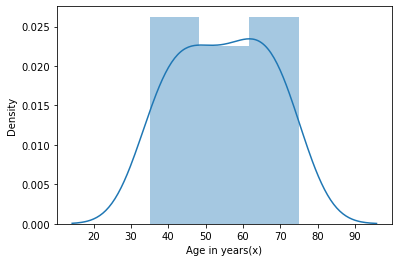

In [11]:
sns.distplot(d['Age in years(x)'])
plt.show()             


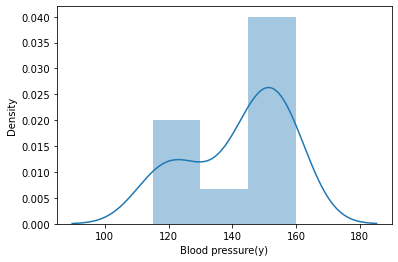

In [12]:
sns.distplot(d['Blood pressure(y)'])
plt.show()

# Checking correlation and plotting Heatmap

In [72]:
d.corr(method='pearson')

,Age in years(x),Blood pressure(y)
Age in years(x),1.000000,0.927513
Blood pressure(y),0.927513,1.000000


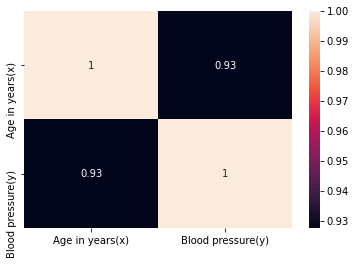

In [73]:
sns.heatmap(d.corr(),annot=True)
plt.show()

# Plotting the dataset

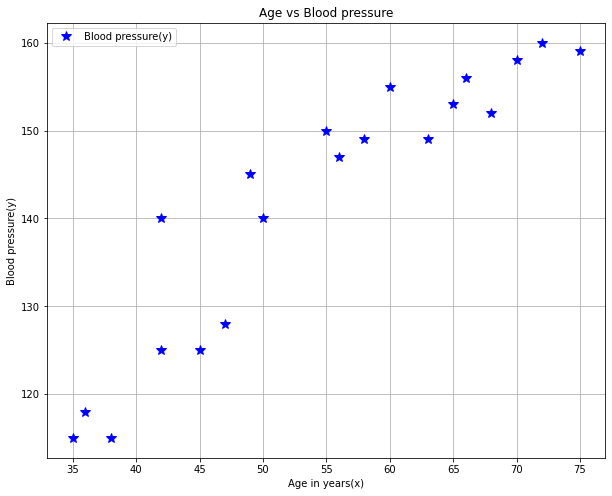

In [78]:
plt.rcParams["figure.figsize"]=[10,8]
d.plot(x='Age in years(x)',y='Blood pressure(y)',style='*',color='blue',markersize=10)
plt.title('Age vs Blood pressure')
plt.xlabel('Age in years(x)')
plt.ylabel('Blood pressure(y)')
plt.grid()
plt.show()
           
           
        

# Plotting the Line of Regression

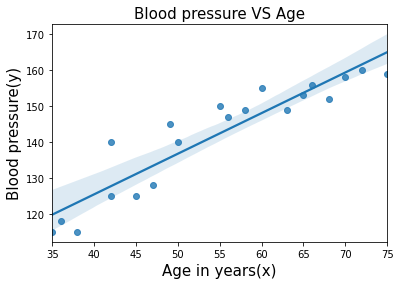

In [68]:
sns.regplot(y=d['Blood pressure(y)'],x=d['Age in years(x)'])
plt.title('Blood pressure VS Age',size=(15))
plt.ylabel('Blood pressure(y)',size=15)
plt.xlabel('Age in years(x)',size=15)
plt.show()
           

# Performing Linear Regression

In [16]:
x=d.iloc[:,:-1].values
y=d.iloc[:,1].values

In [17]:
x

array([[56],
       [42],
       [72],
       [36],
       [63],
       [47],
       [55],
       [49],
       [38],
       [42],
       [68],
       [60],
       [65],
       [66],
       [75],
       [50],
       [35],
       [45],
       [58],
       [70]], dtype=int64)

In [18]:
y

array([147, 125, 160, 118, 149, 128, 150, 145, 115, 140, 152, 155, 153,
       156, 159, 140, 115, 125, 149, 158], dtype=int64)

# Display the shape and first few elements of the data

In [19]:
print(x[:5])

[[56]
 [42]
 [72]
 [36]
 [63]]


In [20]:
print(x.shape)

(20, 1)


In [21]:
print(y[:5])

[147 125 160 118 149]


In [22]:
print(y.shape)

(20,)


# Import library

In [25]:
from sklearn.model_selection import train_test_split

# Perform the split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [28]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15, 1)
(5, 1)
(15,)
(5,)


# Specifying the split size manually by specifying the parameters of test size

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16, 1)
(4, 1)
(16,)
(4,)


# Print the mean values

In [50]:
print(np.mean(x_train))
print(np.mean(x_test))
print(np.mean(y_train))
print(np.mean(y_test))

56.125
48.5
144.0
133.75


In [83]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()

# Fitting the data

In [56]:
l.fit(x_train,y_train)
print("train test complete")

train test complete


# Predicting data

In [57]:
y_pred=l.predict(x_test)
y_pred

array([122.16767518, 121.08283916, 142.77955948, 156.88242769])

# Comparing the actual data vs predicted data

In [59]:
d1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
d1

,Actual,Predicted
0,118,122.167675
1,115,121.082839
2,150,142.779559
3,152,156.882428


# Plot the Predicted data

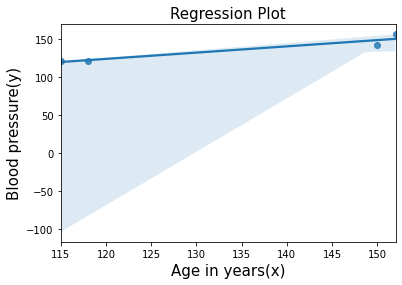

In [69]:
sns.regplot(x=y_test,y=y_pred)
plt.title('Regression Plot',size=15)
plt.ylabel("Blood pressure(y)",size=15)
plt.xlabel("Age in years(x)",size=15)
plt.show()


# What will be the predicted Blood Pressure if the age is 80 years.

In [71]:
h=[80]
r=l.predict([h])
print("Age in years={}".format(h))
print("Predicted Blood Pressure={}".format(r))

Age in years=[80]
Predicted Blood Pressure=[169.90045988]


# Evaluating the model

In [86]:
from sklearn.metrics import r2_score,mean_absolute_error
print('R^2 score:  ',r2_score(y_pred,y_test))
print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))

R^2 score:   0.8544621687989281
Mean Absolute Error 5.588345637177774


# Conclusion

# We find that if the age is 80 years then the predicted BP is 169.90045988 and R^2 for the model is 0.85(Round to three decimal places), which indicate the good fit for the model.